# 聚类
鸢尾花



1. 理解K-Means核心思想
2. 读取鸢尾花部分数据为聚类建模做准备
3. 构建K-Means分类模型
4. 模型调用
5. 模型评估
6. 结果可视化




## 理解K-Means核心思想

K-Means聚类算法（k-means clustering algorithm，k均值聚类算法）是聚类业务中应用广泛又非常好理解的一种迭代求解的聚类分析算法。
1. **簇个数的确定**  
依据个人对数据的理解，专家设定一个簇的个数。
2. **样本集合中簇中心值的确定**  
第1次簇中心值的确定，从原有样本集合中随机按簇个数在样本数据集合中选择样本。
第2次开始至结束前，簇值的确定是将已分类的样本集合中，按类内已分得样本的均值做为新的簇中心值参与下一轮分类计算。
直到求得新一轮的簇中心集求得的分类结果没有新的变化为止
3. **对于选定簇中心，求得簇内相似样本集的过程**  
K-Means算法应用数据样本集合中每个样本与选定的每个簇值进行距离计算，与哪个簇间距离最短，该样本会被分至哪个类中。
K-Means采用贪心的算法，所有样本都会参与计算，每一轮每个簇也会参与计算，不断反复迭代，直到新一轮的簇中心值不能带来新的分类结果为止，如图演示K-Means算法的分类过程。

![图片](./img/1.png)


In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 读取鸢尾花部分数据为聚类建模做准备

In [2]:
# 读取花瓣长度和花瓣宽度数据数据
# Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）和Petal.Width（花瓣宽度），单位是cm
# iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'

# 数据文件路径    ----填写代码




# 花瓣长度和花瓣宽度数据    ----填写代码，仔细思考有点难
X = 
print('花瓣长度和花瓣宽度数据：\n',X)

花瓣长度和花瓣宽度数据：
        2    3
0    1.4  0.2
1    1.4  0.2
2    1.3  0.2
3    1.5  0.2
4    1.4  0.2
..   ...  ...
145  5.2  2.3
146  5.0  1.9
147  5.2  2.0
148  5.4  2.3
149  5.1  1.8

[150 rows x 2 columns]


## 构建 k-means 模型

In [3]:

# 建立K-Means模型
def kMeansModel(n_clusters,X):
    # 构造聚类器    ----填写代码
    
    
    # 聚类训练    ----填写代码
    
    
    # 获取最终簇中心值
    clusterCenters = estimator.cluster_centers_  
    label_pred = estimator.labels_  # 获取聚类标签
    
    return clusterCenters,label_pred

## 调用模型
设定簇个数

In [4]:
# 调用K-Means模型
n_clusters=3

clusterCenters,label_pred = kMeansModel(n_clusters, X)
print('簇中心值：\n',clusterCenters)

#print('clusterCenters[:][0]', clusterCenters[:,0])
print('分类标签值：\n',label_pred)


簇中心值：
 [[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
分类标签值：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


## 模型评估
漏分和多分数据的求解

In [5]:

# 从df1中过滤df1在df2中存在的行，也就是取补集
def dfDistinct(df1,df2):
    df1 = df1.append(df2)
    df1 = df1.append(df2)
    #print("补集(从df1中过滤df1在df2中存在的行):\n%s\n\n" % df1.drop_duplicates(keep=False))
    resultDistinct=df1.drop_duplicates(keep=False)
    return resultDistinct

# 数据合并
# 求取x1,x2相交的补集
def getComplementarySet(x1,x2):
    dfi = pd.merge(x1,x2)  # 取交集
    dfo = pd.merge(x1,x2, how='outer')  # 取并集
    # 从dfo中过滤dfo在dfi中存在的行，也就是取补集，也是类别中分类错误的样本
    rd = dfDistinct(dfo, dfi)
    #print('rd', rd)
    return rd

# 求取聚类所求类别集合与实际集合中不同的样本,即求取x1,x2相交的补集
## 求出分错的样本数据，即类别中没有的点和有的没有被分到的点
def getErrorValues(x_km,X):
    # 求解所有分错的样本
    rd1=getComplementarySet(x_km, X[0:50])
    rd2 = getComplementarySet(x_km, X[50:100])
    rd3 = getComplementarySet(x_km, X[100:150])

    #temp=rd1.shape[0]
    #print('AAAAA',np.isnan(rd1.shape[0]))
    temp=rd1.shape[0] #所有分错的样本的长度
    df=rd1 #所有分错的样本
    df0=dfDistinct(X[0:50], x_km) # 求出原始样本类别中在聚类时没有被分到的样本
    df1=dfDistinct(x_km, X[0:50]) # 求出原始样本类别中没有，但在聚类时被分进来的样本
    if temp>rd2.shape[0]:
        df=rd2
        df0=dfDistinct(X[50:100], x_km)
        df1=dfDistinct(x_km, X[50:100])
        temp=rd2.shape[0]
    elif temp>rd3.shape[0]:
        df = rd3
        df0 = dfDistinct(X[100:150], x_km)
        df1 = dfDistinct(x_km, X[100:150])
        temp = rd3.shape[0]
    #print('X[0:50]',X[0:50])
    #print('X[51:100]', X[50:100])
    #print('X[101:150]', X[100:150])
    return temp,df,df0,df1


#模型评估 错误率
def modelEvaluation(x,y):
    err=x/y
    return err

在主函数程序中增加实现漏分和多分数据的求解

In [7]:

# 模型评估
x0_km = X[label_pred == 0]
print('x0_km',x0_km)
#print('返回列数：', x0.shape[1])
#print('返回行数：', x0.shape[0])
x1_km = X[label_pred == 1]
print('x1_km', x1_km)
x2_km = X[label_pred == 2]
print('x2_km', x2_km)
# temp1:分错集合长度,df1：聚类中所有分错样本,df01：原始样本有聚类中没有的样本，df11：聚类中有原始样本中没有
temp1,df1,df01,df11=getErrorValues(x0_km, X)
temp2,df2,df02,df12= getErrorValues(x1_km, X)
temp3,df3,df03,df13 = getErrorValues(x2_km, X)
# 被错分的概率,即聚类中有原始样本中没有
err11=modelEvaluation(df11.shape[0],x0_km.shape[0])
print('聚类簇1中被额外错分进来样本的概率 ：',err11)
print('聚类簇1中被额外错分进来的样本 ：',df11)
err12 = modelEvaluation(df12.shape[0],x1_km.shape[0])
print('聚类簇2中被额外错分进来样本的概率 ：', err12)
print('聚类簇2中被额外错分进来的样本 ：', df12)
err13 = modelEvaluation(df13.shape[0],x2_km.shape[0])
print('聚类簇3中被额外错分进来样本的概率 ：', err13)
print('聚类簇3中被额外错分进来的样本 ：', df13)

# 漏分的概率,即原始样本有聚类中没有的样本
err01 = modelEvaluation(df01.shape[0], x0_km.shape[0])
print('聚类簇1中漏分样本的概率 ：', err11)
print('聚类簇1中漏分的样本 ：', df01)
err02 = modelEvaluation(df02.shape[0], x1_km.shape[0])
print('聚类簇2中漏分样本的概率 ：', err12)
print('聚类簇2中漏分的样本 ：', df02)
err03 = modelEvaluation(df03.shape[0], x2_km.shape[0])
print('聚类簇3中漏分样本的概率 ：', err13)
print('聚类簇3中漏分的样本 ：', df03)

# 漏分的概率,即原始样本有聚类中没有的样本
err1 = modelEvaluation(df1.shape[0], x0_km.shape[0])
print('聚类簇1中错分样本的概率 ：', err1)
print('聚类簇1中所有错分的样本 ：', df1)
err2 = modelEvaluation(df2.shape[0], x1_km.shape[0])
print('聚类簇2中错分样本的概率 ：', err2)
print('聚类簇2中所有错分的样本 ：', df2)
err3 = modelEvaluation(df3.shape[0], x2_km.shape[0])
print('聚类簇3中错分样本的概率 ：', err3)
print('聚类簇3中所有错分的样本 ：', df3)



'''
print('type_rd11',type(temp1),temp1,rd11)
print('type_rd11', x0_km )
print('df1',df1)
print('df2',df2 )
print('df3',df3 )
print('df01', df01)
print('df02', df02)
print('df03', df03)
print('df11', df11)
print('df12', df12)
print('df13', df13)
'''






x0_km       2    3
0   1.4  0.2
1   1.4  0.2
2   1.3  0.2
3   1.5  0.2
4   1.4  0.2
5   1.7  0.4
6   1.4  0.3
7   1.5  0.2
8   1.4  0.2
9   1.5  0.1
10  1.5  0.2
11  1.6  0.2
12  1.4  0.1
13  1.1  0.1
14  1.2  0.2
15  1.5  0.4
16  1.3  0.4
17  1.4  0.3
18  1.7  0.3
19  1.5  0.3
20  1.7  0.2
21  1.5  0.4
22  1.0  0.2
23  1.7  0.5
24  1.9  0.2
25  1.6  0.2
26  1.6  0.4
27  1.5  0.2
28  1.4  0.2
29  1.6  0.2
30  1.6  0.2
31  1.5  0.4
32  1.5  0.1
33  1.4  0.2
34  1.5  0.1
35  1.2  0.2
36  1.3  0.2
37  1.5  0.1
38  1.3  0.2
39  1.5  0.2
40  1.3  0.3
41  1.3  0.3
42  1.3  0.2
43  1.6  0.6
44  1.9  0.4
45  1.4  0.3
46  1.6  0.2
47  1.4  0.2
48  1.5  0.2
49  1.4  0.2
x1_km        2    3
77   5.0  1.7
83   5.1  1.6
100  6.0  2.5
101  5.1  1.9
102  5.9  2.1
103  5.6  1.8
104  5.8  2.2
105  6.6  2.1
107  6.3  1.8
108  5.8  1.8
109  6.1  2.5
110  5.1  2.0
111  5.3  1.9
112  5.5  2.1
113  5.0  2.0
114  5.1  2.4
115  5.3  2.3
116  5.5  1.8
117  6.7  2.2
118  6.9  2.3
120  5.7  2.3
121  4.9  2.0
122

"\nprint('type_rd11',type(temp1),temp1,rd11)\nprint('type_rd11', x0_km )\nprint('df1',df1)\nprint('df2',df2 )\nprint('df3',df3 )\nprint('df01', df01)\nprint('df02', df02)\nprint('df03', df03)\nprint('df11', df11)\nprint('df12', df12)\nprint('df13', df13)\n"

## 可视化


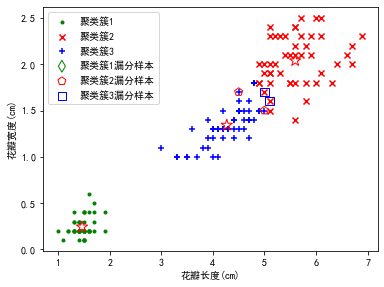

In [8]:

# 画图
def createPlot(x0_km,x1_km,x2_km,clusterCenters,df01,df02,df03):
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(6, 4.5), facecolor='w')
    # 画出聚类的值
    plt.scatter(x0_km[2], x0_km[3], c="green", marker='.', label='聚类簇1')
    plt.scatter(x1_km[2], x1_km[3], c="red", marker='x', label='聚类簇2')
    plt.scatter(x2_km[2], x2_km[3], c="blue", marker='+', label='聚类簇3')

    # 画聚类中心点
    plt.scatter(clusterCenters[:,0],clusterCenters[:,1], s=140, marker='*', facecolors='none', edgecolors='r', zorder=10)  # 圈中测试集样本
    # 画聚类错误的样本点
    if len(list(df01))>0:
        plt.scatter(df01[2], df01[3], s=70, marker='d', facecolors='none', edgecolors='green', zorder=10, label='聚类簇1漏分样本')
    if len(list(df02))>0:
        plt.scatter(df02[2], df02[3], s=70, marker='p', facecolors='none', edgecolors='red', zorder=10, label='聚类簇2漏分样本')
    if len(list(df03))>0:
        plt.scatter(df03[2], df03[3], s=70, marker='s', facecolors='none', edgecolors='blue', zorder=10, label='聚类簇3漏分样本')
    plt.xlabel('花瓣长度(cm)')
    plt.ylabel('花瓣宽度(cm)')
    plt.legend(loc=2)
    plt.show()

    
    
#画图
createPlot(x0_km, x1_km, x2_km, clusterCenters, df01, df02, df03)